In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the yfinance package.
import yfinance as yf
import pandas as pd
from typing import List

def download_stocks(tickers: List[str]) -> List[pd.DataFrame]:
    """
    Downloads stock data from Yahoo Finance.

    Args:
        tickers: A list of stock tickers.

    Returns:
        A list of Pandas DataFrames, one for each stock.
    """

    # Create a list of DataFrames.
    df_list = []

    # Iterate over the tickers.
    for ticker in tickers:
        # Download the stock data.
        df = yf.download(ticker)

        # Add the DataFrame to the list.
        df_list.append(df.tail(255*10))

    return df_list

In [ ]:
list_of_stocks = download_stocks(['GOOGL', 'MSFT', 'IBM', 'AMZN', 'NFLX'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tickers = []
deltas = []
sectors =[]
market_caps = []

for ticker in ['GOOGL', 'MSFT', 'IBM', 'AMZN']:

    try:
        ## create Ticker object
        stock = yf.Ticker(ticker)
        tickers.append(ticker)

        ## download info
        info = stock.info

        ## download sector
        sectors.append(info['sector'])

        ## download daily stock prices for 2 days
        hist = stock.history('2d')

        ## calculate change in stock price (from a trading day ago)
        deltas.append((hist['Close'][1]-hist['Close'][0])/hist['Close'][0])

        ## calculate market cap
        market_caps.append(info['sharesOutstanding'] * info['previousClose'])

        ## add print statement to ensure code is running
        print(f'downloaded {ticker}')
    except Exception as e:
        print(e)

downloaded GOOGL
downloaded MSFT
downloaded IBM
downloaded AMZN


In [ ]:
df = pd.DataFrame(
    {
        'ticker':tickers,
        'sector': sectors,
        'delta': deltas,
        'market_cap': market_caps,
    }
)

In [ ]:
color_bin = [-1, -0.02, -0.01, 0, 0.01, 0.02, 1]
df['colors'] = pd.cut(df['delta'], bins=color_bin, labels=['red', 'indianred', 'lightpink', 'lightgreen', 'lime', 'green'])
df

,ticker,sector,delta,market_cap,colors
0,GOOGL,Communication Services,0.017213,7.161876e+11,lime
1,MSFT,Technology,0.015380,2.480182e+12,lime
2,IBM,Technology,-0.019448,1.213965e+11,indianred
3,AMZN,Consumer Cyclical,0.040095,1.280806e+12,green


In [ ]:
import plotly.express as px
fig = px.treemap(
    df,
    path=[px.Constant("all"), 'sector', 'ticker'],
    values='market_cap',
    color='colors',
    hover_data = {'delta':':.2p'})
fig.show()

In [ ]:
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import mplfinance as mpf
import pandas as pd

def plot_candlestick(df: pd.DataFrame) -> None:
    """
    This function takes a pandas DataFrame as input and plots a candlestick plot using the 'Open', 'High', 'Low', and 'Close' columns.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame with 'Open', 'High', 'Low', and 'Close' columns.

    Returns:
    None
    """
    # Ensure the DataFrame is sorted by date
    df = df.sort_index()

    # Create a candlestick plot
    mpf.plot(df, type='candle', style='charles',
             title='Candlestick chart',
             ylabel='Price',
             volume=True,
             ylabel_lower='Shares\nTraded Volume',
             mav=(20, 50))  # moving averages


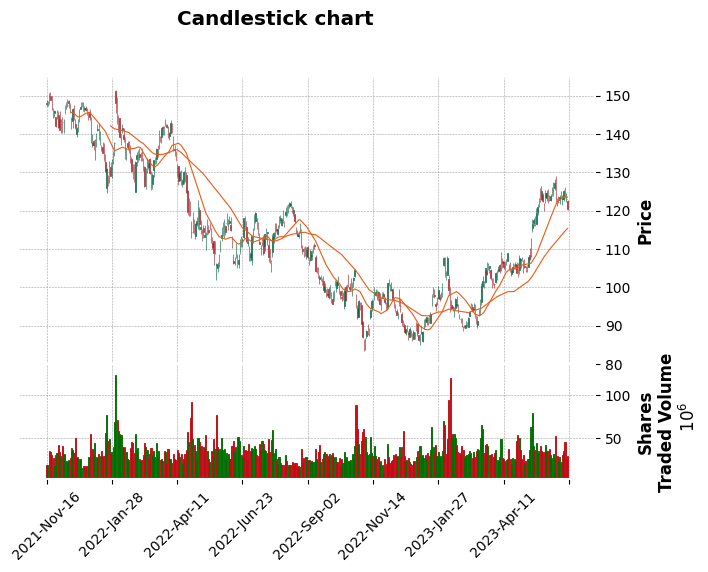

In [ ]:
plot_candlestick(list_of_stocks[0])

In [ ]:
table = pd.DataFrame([list_of_stocks[j]['Close'] for j in range(len(list_of_stocks))]).transpose()
table.columns = ['GOOGL', 'MSFT', 'IBM', 'AMZN', 'NFLX']
table

,GOOGL,MSFT,IBM,AMZN,NFLX
Date,,,,,
2013-05-07,21.452202,33.310001,194.674957,12.886500,29.464287
2013-05-08,21.862614,32.990002,195.812622,12.934000,29.801430
2013-05-09,21.808809,32.660000,194.302109,13.008000,30.915714
2013-05-10,22.027779,32.689999,195.478012,13.181500,31.098572
2013-05-13,21.960211,33.029999,193.565964,13.225500,32.768570
...,...,...,...,...,...
2023-06-15,125.089996,348.100006,138.399994,127.110001,445.269989
2023-06-16,123.529999,342.329987,137.479996,125.489998,431.959991
2023-06-20,123.099998,338.049988,135.960007,125.779999,434.700012


In [ ]:
table.index

DatetimeIndex(['2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01',
               ...
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20',
               '2023-06-21', '2023-06-22'],
              dtype='datetime64[ns]', name='Date', length=400, freq=None)

In [ ]:
from datetime import datetime

In [ ]:
df = table
start_datetime = datetime(2015, 1, 1)
end_datetime = datetime(2017, 1, 1)

In [ ]:
str(start_datetime).split(' ')[0]

'2015-01-01'

In [ ]:
df.head(3)

,GOOGL,MSFT,IBM,AMZN,NFLX
Date,,,,,
2013-05-07,21.452202,33.310001,194.674957,12.8865,29.464287
2013-05-08,21.862614,32.990002,195.812622,12.9340,29.801430
2013-05-09,21.808809,32.660000,194.302109,13.0080,30.915714


In [ ]:
df.tail(3)

,GOOGL,MSFT,IBM,AMZN,NFLX
Date,,,,,
2023-06-20,123.099998,338.049988,135.960007,125.779999,434.700012
2023-06-21,120.550003,333.559998,133.690002,124.830002,424.450012
2023-06-22,122.925003,339.760010,131.210007,130.175003,420.720001


In [ ]:
new_index = [df.index[t].date() for t in range(len(df.index))]

In [ ]:
check1 = tuple([new_index[t] >= start_datetime.date() for t in range(len(new_index))])
check2 = tuple([new_index[t] <= end_datetime.date() for t in range(len(new_index))])

In [ ]:
final_idx = [check1[t] and check2[t] for t in range(len(new_index))]

In [ ]:
df[final_idx]

,GOOGL,MSFT,IBM,AMZN,NFLX
Date,,,,,
2015-01-02,26.477501,46.759998,154.933075,15.426000,49.848572
2015-01-05,25.973000,46.330002,152.495224,15.109500,47.311428
2015-01-06,25.332001,45.650002,149.206497,14.764500,46.501431
2015-01-07,25.257500,46.230000,148.231354,14.921000,46.742859
2015-01-08,25.345501,47.590000,151.453156,15.023000,47.779999
...,...,...,...,...,...
2016-12-23,40.389999,63.240002,159.378586,38.029499,125.589996
2016-12-27,40.496498,63.279999,159.789673,38.570000,128.350006
2016-12-28,40.228500,62.990002,158.881454,38.606499,125.889999


In [ ]:
filtered_df = df[(df.index >= start_datetime) & (df.index <= end_datetime)]
filtered_df.shape, filtered_df

((504, 5),
                 GOOGL       MSFT         IBM       AMZN        NFLX
 Date                                                               
 2015-01-02  26.477501  46.759998  154.933075  15.426000   49.848572
 2015-01-05  25.973000  46.330002  152.495224  15.109500   47.311428
 2015-01-06  25.332001  45.650002  149.206497  14.764500   46.501431
 2015-01-07  25.257500  46.230000  148.231354  14.921000   46.742859
 2015-01-08  25.345501  47.590000  151.453156  15.023000   47.779999
 ...               ...        ...         ...        ...         ...
 2016-12-23  40.389999  63.240002  159.378586  38.029499  125.589996
 2016-12-27  40.496498  63.279999  159.789673  38.570000  128.350006
 2016-12-28  40.228500  62.990002  158.881454  38.606499  125.889999
 2016-12-29  40.144001  62.900002  159.273422  38.257500  125.330002
 2016-12-30  39.622501  62.139999  158.690247  37.493500  123.800003
 
 [504 rows x 5 columns])

The efficient frontier is a concept in Modern Portfolio Theory. It is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

Mathematically, the efficient frontier is the solution to the following optimization problem:

Minimize:
$$ \sigma_p = \sqrt{w^T\Sigma w} $$

Subject to:
$$ R_p = w^T \mu $$

Where:

- $w$ is a vector of portfolio weights.

- $\Sigma$ is the covariance matrix of asset returns.

- $\mu$ is the vector of expected asset returns.

- $\sigma_p$ is the portfolio standard deviation (risk).

- $R_p$ is the portfolio expected return.

Here, $w^T$ denotes the transpose of $w$. The symbol $\sqrt{w^T\Sigma w}$ represents the standard deviation (volatility) of the portfolio returns, which is a measure of risk. The equation $R_p = w^T \mu$ states that the expected return of the portfolio should be equal to the portfolio weights times the expected returns of the individual assets.

Note: This is the simplified version of the efficient frontier. In practice, one might consider additional constraints such as no short-selling (i.e., weights must be non-negative) or a requirement that all weights sum to one.

Text(0, 0.5, 'daily returns')

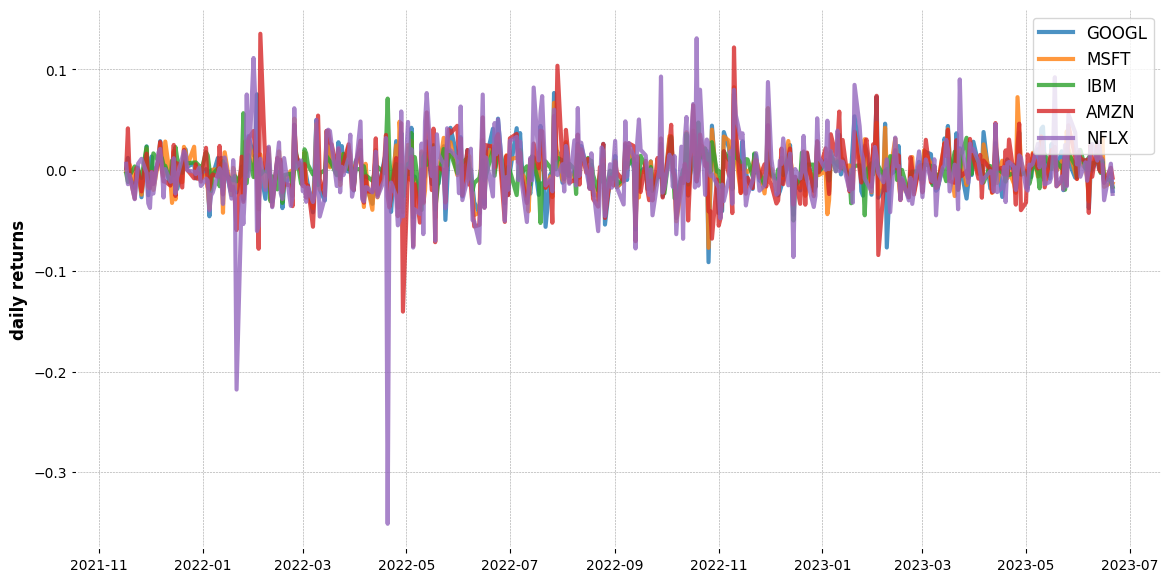

In [ ]:
import matplotlib.pyplot as plt

returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
from typing import Tuple
import numpy as np

def portfolio_annualised_performance(weights: np.ndarray, mean_returns: np.ndarray, cov_matrix: np.ndarray) -> Tuple[float, float]:
    """
    Given the weights of the assets in the portfolio, their mean returns, and their covariance matrix,
    this function computes and returns the annualized performance of the portfolio in terms of its
    standard deviation (volatility) and expected returns.

    Args:
        weights (np.ndarray): The weights of the assets in the portfolio.
                              Each weight corresponds to the proportion of the investor's total
                              investment in the corresponding asset.

        mean_returns (np.ndarray): The mean (expected) returns of the assets.

        cov_matrix (np.ndarray): The covariance matrix of the asset returns. Each entry at the
                                 intersection of a row and a column represents the covariance
                                 between the returns of the asset corresponding to that row
                                 and the asset corresponding to that column.

    Returns:
        Tuple of portfolio volatility (standard deviation) and portfolio expected return, both annualized.
    """

    # Annualize portfolio returns by summing up the products of the mean returns and weights of each asset and then multiplying by 252
    # (number of trading days in a year)
    returns = np.sum(mean_returns*weights ) * 252

    # Compute portfolio volatility (standard deviation) by dot multiplying the weights transpose and the dot product of covariance matrix
    # and weights. Then take the square root to get the standard deviation and multiply by square root of 252 to annualize it.
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    return std, returns


In [ ]:
from typing import List, Tuple
import numpy as np

def random_portfolios(
    num_portfolios: int,
    num_weights: int,
    mean_returns: np.ndarray,
    cov_matrix: np.ndarray,
    risk_free_rate: float) -> Tuple[np.ndarray, List[np.ndarray]]:
    """
    Generate random portfolios and calculate their standard deviation, returns and Sharpe ratio.

    Args:
        num_portfolios (int): The number of random portfolios to generate.

        mean_returns (np.ndarray): The mean (expected) returns of the assets.

        cov_matrix (np.ndarray): The covariance matrix of the asset returns. Each entry at the
                                 intersection of a row and a column represents the covariance
                                 between the returns of the asset corresponding to that row
                                 and the asset corresponding to that column.

        risk_free_rate (float): The risk-free rate of return.

    Returns:
        Tuple of results and weights_record.

        results (np.ndarray): A 3D array with standard deviation, returns and Sharpe ratio of the portfolios.

        weights_record (List[np.ndarray]): A list with the weights of the assets in each portfolio.
    """
    # Initialize results array with zeros
    results = np.zeros((3, num_portfolios))

    # Initialize weights record list
    weights_record = []

    # Loop over the range of num_portfolios
    for i in np.arange(num_portfolios):
        # Generate random weights
        weights = np.random.random(num_weights)

        # Normalize weights
        weights /= np.sum(weights)

        # Record weights
        weights_record.append(weights)

        # Calculate portfolio standard deviation and returns
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)

        # Store standard deviation, returns and Sharpe ratio in results
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev

    return results, weights_record


In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, len(mean_returns), mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("\n")
    print(max_sharpe_allocation.div(max_sharpe_allocation.sum(axis=1), axis=0))

    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("\n")
    print(min_vol_allocation.div(min_vol_allocation.sum(axis=1), axis=0))

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

    return max_sharpe_allocation

In [ ]:
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o',
               s=10, alpha=0.3)
    ax.colorbar()
    ax.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Minimum volatility')
    ax.set_title('Simulated Portfolio Optimization based on Efficient Frontier')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, len(mean_returns), mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o',
               s=10, alpha=0.3)
    # ax.colorbar()
    ax.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Minimum volatility')
    ax.set_title('Simulated Portfolio Optimization based on Efficient Frontier')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

    return max_sharpe_allocation

In [ ]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.21


            GOOGL  MSFT    IBM   AMZN  NFLX
allocation   1.48  3.26  82.31  11.53  1.42


             GOOGL    MSFT     IBM    AMZN    NFLX
allocation  0.0148  0.0326  0.8231  0.1153  0.0142
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.21


            GOOGL  MSFT    IBM  AMZN   NFLX
allocation   3.12  8.49  76.96  0.76  10.67


             GOOGL    MSFT     IBM    AMZN    NFLX
allocation  0.0312  0.0849  0.7696  0.0076  0.1067


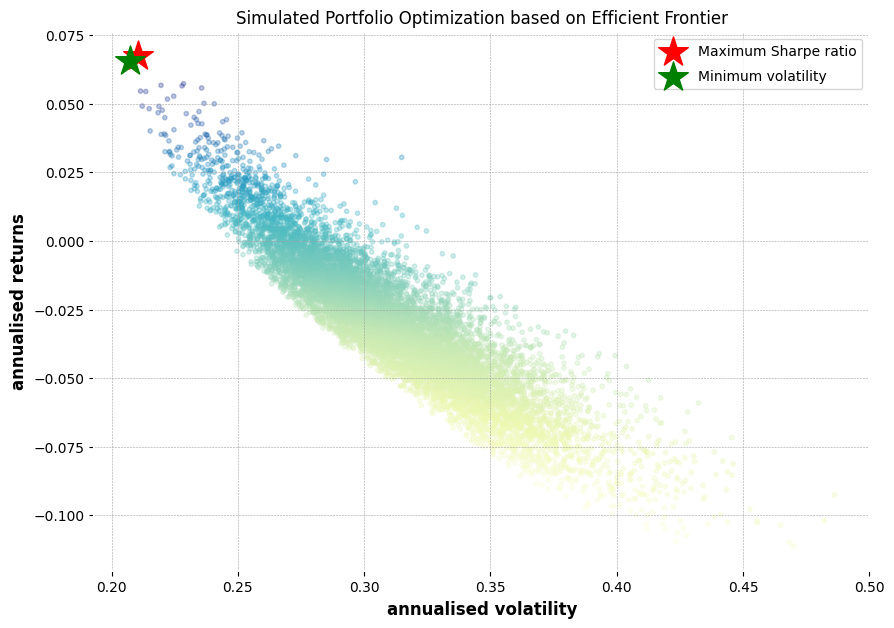

In [ ]:
a = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)